# Bayes Assignment

**Author:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports from third party libraries
from sympy import exp, sqrt, pi , solve
from sympy.abc import x
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# My imports
from hwbayes_montyhall import hwbayes_montyhall

## Bayes Decision Theory

Write code to answer each question and print out the result (so that the result
would be part of your PDF report).

Consider the following class-conditional density functions. Note that the $N()$
notation below is given as $N(mean, variance)$$. Make sure you pay attention to
the difference between standard deviation and variance in any function you use.

1. $P(x | w_1) = N(1,1)$
2. $P(x | w_2) = N(2, 3^2)$ (This is a normal distribution of 3, variance of 9).
3. And the folllowing prior probabilities:
   1. $P(w_1) = 0.6$
   2. $P(w_2) = 0.4$

In [3]:
# Define function for generating normal distribution (exact values)
N = lambda x, mu, sigma: stats.norm.pdf(x, mu, sigma)

# Define equation for normal distribution (symbolic equation)
f = lambda mu, sigma: 1 / (sigma * sqrt(2 * pi)) * exp(-.5 * (x - mu) ** 2 / sigma ** 2)

# Define function for calculating the likelihood ratio
likelihood = lambda x, params1, params2: (N(x, *params1) * 0.6) / (N(x, *params2) * 0.4)

# Define function for classifying a point
def classify(x, params1, params2):
    LR = likelihood(x, params1, params2)
    group = "w1" if LR > 1 else "w2"
    print(f'Likelihood ratio: {LR:.2f}\nClass: {group}')

# Define function for plotting probability distribution curve
def plot_dist(x, y, color, label, ax):
    ax.plot(x, y, color=color, lw=1, label=label)
    ax.fill_between(x, y, color=color, alpha=0.2)

### PDFs:  $P(x|w_1)$ and $P(x|w_2)$

Plot the PDFs for $P(x|w_1)$ and $P(x|w_2)$ for `x = -10:0.15:10` on the same
figure.

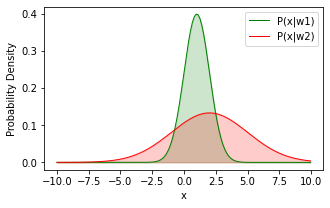

In [4]:
# Define x range and distributions
xrng = np.arange(-10, 10, 0.15)
Pxw1 = N(xrng, 1, 1)
Pxw2 = N(xrng, 2, 3)

# PLot the PDFs P(x|w1) and P(x|w2)
fig, ax = plt.subplots(figsize=(5, 3))
plot_dist(xrng, Pxw1, 'green', 'P(x|w1)', ax)
plot_dist(xrng, Pxw2, 'red', 'P(x|w2)', ax)
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
plt.legend();

### Posterior Probabilities: $P(w_1|x)$ and $P(w_2|x)$

**Note:** For any given x, the posterior probabilities must sum to 1.

$$
\begin{align*}
posterior &= \frac{likelihood * prior}{evidence} \\
P(w|x) &= \frac{P(x|w) * P(w)}{P(x)} \\
evidence &= P(x|w_1) * P(w_1) + P(x|w_2) * P(w_2) \\
P(w_1) = 0.6, &~ P(w_2) = 0.4
\end{align*}
$$

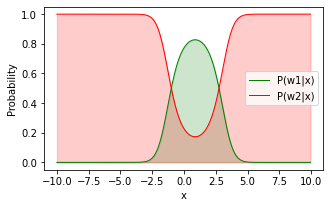

In [5]:
# Define prior probabilities and evidence
Pw1, Pw2 = 0.6, 0.4
Pe = Pxw1 * Pw1 + Pxw2 * Pw2

# Calculate posterior probabilities
Pw1x = Pxw1 * Pw1 / Pe
Pw2x = Pxw2 * Pw2 / Pe

# Plot the posterior probabilities
fig, ax = plt.subplots(figsize=(5, 3))
plot_dist(xrng, Pw1x, 'green', 'P(w1|x)', ax)
plot_dist(xrng, Pw2x, 'red', 'P(w2|x)', ax)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
plt.legend();

### Likelihood Ratio: $\frac{P(w_1|x)}{P(w_2|x)}$ and Decision Threshold(s)

Print the values of the decision thresholds, as well as plot them as lines on
the likelihood ratio plot. You may find the decision boundaries analytically
(using `syms` & `solve()`) or using an external tool (e.g., Wolfram-Alpha) and
hardcoding what you get from the external tool.

$$
\begin{align*}
    \text{To solve for the decision threshold }&
    \text{we set the likelihood ratio to 1.} \\
    \frac{P(w_1|x)}{P(w_2|x)} &= 1 \\
    \frac{P(x|w_1) * P(w_1)}{P(x|w_2) * P(w_2)} &= 1 \\
    \frac{N(1,1)\cdot P(w_1)}{N(2,3^2) \cdot P(w_2)} &= 1
\end{align*}
$$

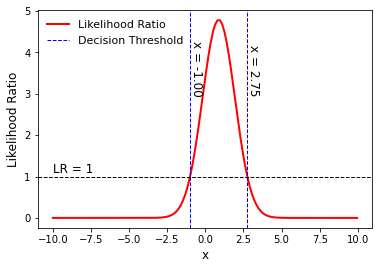

In [6]:
# Solve equation for x
decision_threshold = solve((f(1,1) * Pw1) / (f(2,3) * Pw2) - 1)

# Calculate likelihood ratio
LR = Pw1x / Pw2x

# Plot the likelihood ratio
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(xrng, LR, color='red', lw=2, label='Likelihood Ratio')
ax.set_xlabel('x', fontsize=12);
ax.set_ylabel('Likelihood Ratio', fontsize=12);

# Show decision boundaries
for i, dt in enumerate(decision_threshold):
    lab = 'Decision Threshold' if i == 1 else None
    ax.axvline(dt, color='blue', ls='--', lw=1, label=lab)
    ax.text(dt, 3, f'x = {dt:.2f}', rotation=270, fontsize=12)
ax.axhline(1, color='black', ls='--', lw=1)
ax.text(-10, 1.1, 'LR = 1', fontsize=12)

# Add legend (in top left corner) with no bounding box
ax.legend(loc='upper left', fontsize=11, frameon=False);

#### Likelihood Ratio for a Sample with `x = -3`

Print the value of the likelihood ratio. Comment/print how you would classify
this sample; as $w_1$ or $w_2$?

In [7]:
classify(-3, (1, 1), (2, 3))

Likelihood ratio: 0.01
Class: w2


#### Likelihood Ratio for a Sample with `x = 0`

Print the value of the likelihood ratio. Comment/print how you would classify
this sample; as $w_1$ or $w_2$?

In [8]:
classify(0, (1, 1), (2, 3))

Likelihood ratio: 3.41
Class: w1


#### Likelihood Ratio for a Sample with `x = 3`

Print the value of the likelihood ratio. Comment/print how you would classify
this sample; as $w_1$ or $w_2$?

In [9]:
classify(3, (1, 1), (2, 3))

Likelihood ratio: 0.64
Class: w2


## Monty Hall Simulation

Keep the test cases below as they are.

In [10]:
# 0: Never switch door
winratio = hwbayes_montyhall(0, 1000)
print(f'Win ratio when never switching door: {winratio:.2f}%')

Win ratio when never switching door: 34.70%


In [11]:
# 1: Always switch door
winratio = hwbayes_montyhall(1, 1000)
print(f'Win ratio when always switching door: {winratio:.2f}%')

Win ratio when always switching door: 66.60%


In [12]:
# 2: Switch door at random (switch or stay with equal probability)
winratio = hwbayes_montyhall(2, 1000)
print(f'Win ratio when switching door at random: {winratio:.2f}%')

Win ratio when switching door at random: 51.60%
